## Data nomalizing, masking, fold change
---

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
df=pd.read_excel('./RNAseq_result.xlsx')

In [3]:
df.head()

,target_id,WT1,WT2,WT3,Treat1,Treat2,Treat3,Treat4,Treat5,Treat6
0,ENSMUST00000177564.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSMUST00000196221.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUST00000179664.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSMUST00000178537.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSMUST00000178862.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
selected_mat=df.values[:,1:].astype(float) #데이터프레임의 모든 값을 numpy array 형태로 [가져올 행, 가져올 열]

<Figure size 7200x7200 with 0 Axes>

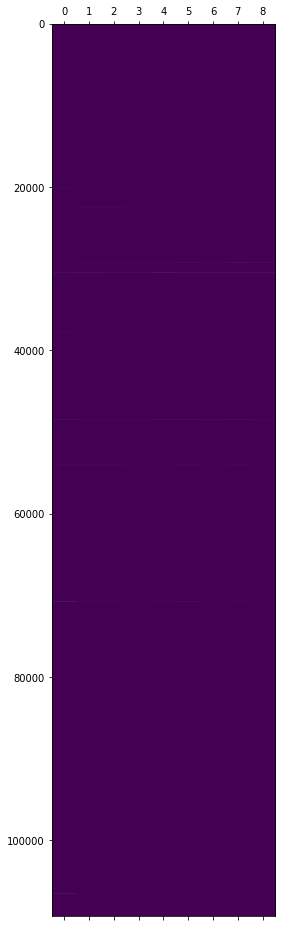

In [5]:
plt.figure(figsize=(100,100))
plt.matshow(selected_mat,aspect='auto')
plt.show()
#matrix 시각화를 위해서는 항상 대상을 실수형으로 설정해야 >> .astype(float)

---
### Data nomalizing
* 위 heatmap처럼 각 value의 차이가 크지 않은 데이터는 nomalizing을 거쳐야 시각화할 수 있다
* z-score: 평균 0.0, 표준편차 1.0으로 만드는 기법
---

In [6]:
zscore_mat = ss.zscore(selected_mat.T).T

/biotools/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning: divide by zero encountered in true_divide
  return (a - mns) / sstd
/biotools/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


<Figure size 7200x7200 with 0 Axes>

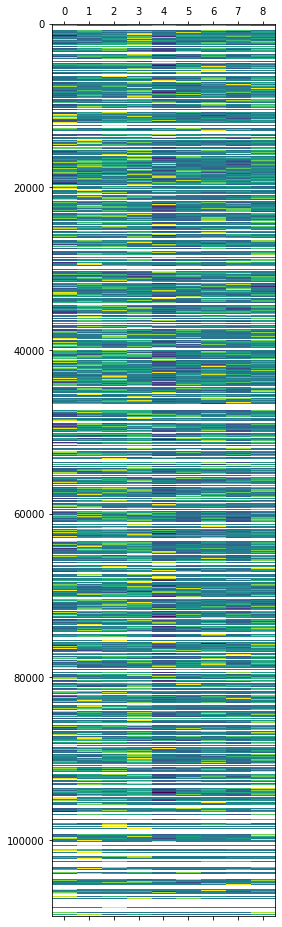

In [7]:
plt.figure(figsize=(100,100))
plt.matshow(zscore_mat,aspect='auto')
plt.show()

---
### masking
* 위 heatmap에서는 중간중간 결측치 (NaN) 가 있어 시각화 효과가 떨어진다.
* 이 때, NaN 값을 제거하는데 마스킹을 이용한다
---

In [8]:
m=~np.isnan(zscore_mat[:,0]) #nan 값 제거. 마스킹을 이용함

<Figure size 7200x7200 with 0 Axes>

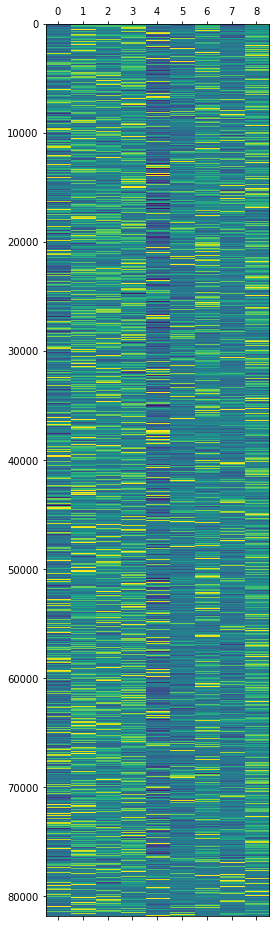

In [9]:
plt.figure(figsize=(100,100))
plt.matshow(zscore_mat[m],aspect='auto')
plt.show() #nan 값으로 인한 공백이 제거되었음

---
### fold change 구하기
---

In [10]:
df['WT_mean']=np.mean(df.values[:,1:4],axis=1)
df['Treat_mean']=np.mean(df.values[:,4:10],axis=1)

fold_chage=df['WT_mean'].values/(df['Treat_mean'].values+0.000000001)
#zero division을 예방하기 위해 미소값을 더해 줌. 오차 생성 가능성이 있음

df['fold_chage']=fold_chage

In [11]:
df.head()

,target_id,WT1,WT2,WT3,Treat1,Treat2,Treat3,Treat4,Treat5,Treat6,WT_mean,Treat_mean,fold_chage
0,ENSMUST00000177564.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,ENSMUST00000196221.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,ENSMUST00000179664.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,ENSMUST00000178537.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,ENSMUST00000178862.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [12]:
#10배 이상 발현한 sample만 screening
m=fold_chage>10
mrnas=df['target_id'].values
mrnas[m]

array(['ENSMUST00000174382.7', 'ENSMUST00000166442.2',
       'ENSMUST00000188251.6', ..., 'ENSMUST00000185932.1',
       'ENSMUST00000186842.1', 'ENSMUST00000096981.3'], dtype=object)

<Figure size 7200x7200 with 0 Axes>

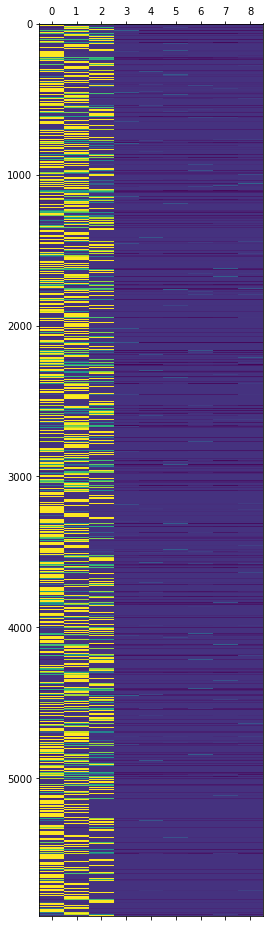

In [13]:
#WT에 비해 높은 발현값을 가지는 sample을 heatmap으로 표현
plt.figure(figsize=(100,100))
plt.matshow(zscore_mat[m],aspect='auto')
plt.show()

---
* ex) modified_matrix 값에서 WT 의 standard deviation, Treat의 standard deviation 이 0.5보다 작은 유전자만 가져와서 heatmap을 그려보자
---

In [14]:
wt_std=np.std(zscore_mat[:,0:3],axis=1)
treat_std=np.std(zscore_mat[:,3:9],axis=1)

m1=wt_std<0.5
m2=treat_std<0.5

/biotools/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/biotools/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


<Figure size 7200x7200 with 0 Axes>

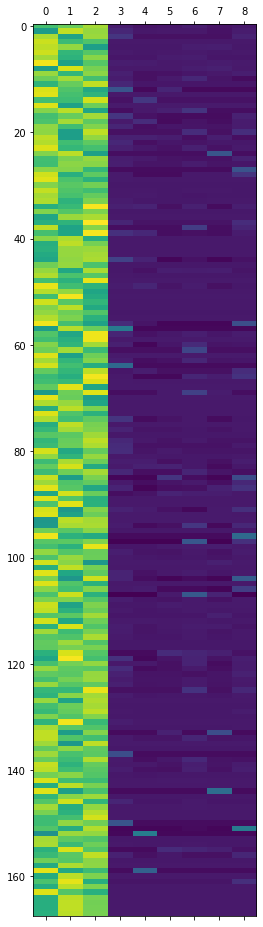

In [15]:
plt.figure(figsize=(100,100))
plt.matshow(zscore_mat[m&m1&m2],aspect='auto')
plt.show()